In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/itba-cifar-100-2024-q-1/y_train_fine.npy
/kaggle/input/itba-cifar-100-2024-q-1/y_train_coarse.npy
/kaggle/input/itba-cifar-100-2024-q-1/fine_label_names.pck
/kaggle/input/itba-cifar-100-2024-q-1/coarse_label_names.pck
/kaggle/input/itba-cifar-100-2024-q-1/x_test.npy
/kaggle/input/itba-cifar-100-2024-q-1/x_train.npy


Cargo datasets de train, test, y las clases fine (100) y coarse (20).

Divido por 255 para normalizar el RGB a algo entre 0.0 y 1.0

In [62]:
x_train = np.load("/kaggle/input/itba-cifar-100-2024-q-1/x_train.npy")
x_test = np.load("/kaggle/input/itba-cifar-100-2024-q-1/x_test.npy")
y_train_coarse = np.load("/kaggle/input/itba-cifar-100-2024-q-1/y_train_coarse.npy")
y_train_fine = np.load("/kaggle/input/itba-cifar-100-2024-q-1/y_train_fine.npy")

In [3]:
import pickle
with open("/kaggle/input/itba-cifar-100-2024-q-1/fine_label_names.pck", "rb") as f:
    labels_fine = pickle.load(f)
with open("/kaggle/input/itba-cifar-100-2024-q-1/coarse_label_names.pck", "rb") as f:
    labels_coarse = pickle.load(f)

In [40]:
indices_train = np.arange(len(x_train))
np.random.shuffle(indices_train)

x_train = x_train[indices_train]
y_train_coarse = y_train_coarse[indices_train]
y_train_fine = y_train_fine[indices_train]

# EDA

### A ojo

In [ ]:
x_train.shape # 50k imágenes, de 32x32 pixeles, RGB (3 canales)

In [ ]:
x_test.shape # 10k imágenes, de 32x32 pixeles, RGB (3 canales)

In [ ]:
labels_fine # 100 clases específicas

In [ ]:
labels_coarse # 10 clases generales

In [ ]:
# Composición de cada superclase
for i, coarse in enumerate(labels_coarse):
    print(f"Coarse label: {coarse}")
    for fine in np.unique(y_train_fine[y_train_coarse == i]):
        print(f"\tFine label: {labels_fine[fine]}")

In [ ]:
y_train_coarse.shape # Clasicaciones coarse para las 50k imágenes

In [ ]:
y_train_fine.shape # Clasificaciones fine para las 50k imágenes

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
%matplotlib inline

coarse N°: 13
fine N°: 77

coarse label: non-insect_invertebrates
fine label: snail



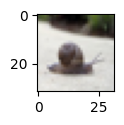

In [10]:
image_to_test = 56;

plt.figure(figsize=(1,1))
plt.imshow(x_train[image_to_test])

print("coarse N°: " + str(y_train_coarse[image_to_test]))
print("fine N°: " + str(y_train_fine[image_to_test]))
print("")
print("coarse label: " + labels_coarse[y_train_coarse[image_to_test]])
print("fine label: " + labels_fine[y_train_fine[image_to_test]])
print("")

### Statistics & *fancy plots*

In [ ]:
fine_class_counts = Counter(y_train_fine)
fine_classes, fine_counts = zip(*sorted(fine_class_counts.items()))

coarse_class_counts = Counter(y_train_coarse)
coarse_classes, coarse_counts = zip(*sorted(coarse_class_counts.items()))

In [ ]:
plt.figure(figsize=(15, 5))
plt.bar(fine_classes, fine_counts, color='skyblue')
plt.xlabel('Fine Class')
plt.ylabel('Count')
plt.title('Distribution of Fine Classes')
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(coarse_classes, coarse_counts, color='salmon')
plt.xlabel('Coarse Class')
plt.ylabel('Count')
plt.title('Distribution of Coarse Classes')
plt.show()

In [ ]:
print("Statistics of Fine Classes Distribution:")
print(f"Total classes: {len(fine_class_counts)}")
print(f"Average samples per class: {np.mean(list(fine_class_counts.values())):.2f}")
print(f"Standard deviation of samples per class: {np.std(list(fine_class_counts.values())):.2f}\n")

print("Statistics of Coarse Classes Distribution:")
print(f"Total classes: {len(coarse_class_counts)}")
print(f"Average samples per class: {np.mean(list(coarse_class_counts.values())):.2f}")
print(f"Standard deviation of samples per class: {np.std(list(coarse_class_counts.values())):.2f}")

#### t-SNE visualization

[TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE)

In [ ]:
x_train_flat = x_train[:2000].reshape(x_train[:2000].shape[0], -1)
tsne = TSNE(n_components=3, random_state=42)
x_train_tsne = tsne.fit_transform(x_train_flat)

In [ ]:
print(x_train_flat.shape) # 2k imagenes con 3072 features
print(x_train_tsne.shape) # 2k imágenes con 3 festures

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], x_train_tsne[:, 2], c=y_train_fine[:2000], cmap='tab10', alpha=0.6)
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)
ax.set_title("t-SNE visualization of CIFAR-100 (first 2000 images) in 3D")
ax.set_xlabel("t-SNE feature 1")
ax.set_ylabel("t-SNE feature 2")
ax.set_zlabel("t-SNE feature 3")
plt.show()

In [ ]:
fig = px.scatter_3d(
    x_train_tsne, x=0, y=1, z=2,
    color=y_train_fine[:2000],
    title="t-SNE visualization of CIFAR-100 (first 2000 images) in 3D",
    labels={'0': 't-SNE feature 1', '1': 't-SNE feature 2', '2': 't-SNE feature 3', 'color': 'Fine Class'}
)
fig.show()

## imaug

In [21]:
from imgaug import augmenters as iaa
import random
from keras.utils import to_categorical

In [12]:
seq = iaa.Sequential([
    iaa.Fliplr(0.5),
    iaa.CropAndPad(px=(-2, 2),sample_independently=True,pad_mode=["constant", "edge"]),
    iaa.Affine(shear=(-10, 10),mode = ['symmetric','wrap']),#48
    iaa.Add((-5, 5)),
    iaa.Multiply((0.8, 1.2)),

],random_order=True)

In [64]:
# reshape images to RGB scale with width & height are size 32
x_train_proc = x_train.reshape(50000, 32 * 32 * 3)
x_test_proc = x_test.reshape(10000, 32 * 32 * 3)

# normalization to avoid gradient explode or vanish
x_train_proc = x_train_proc.astype("float32")
x_test_proc = x_test_proc.astype("float32")
x_train_proc /= 255.0
x_test_proc /= 255.0

In [42]:
# convert class into one hot encoder
y_train_fine_proc = to_categorical(y_train_fine, 100)

In [ ]:
x_train2 = x_train.reshape(50000, 3, 32, 32).transpose(0,2,3,1)

In [ ]:
X1 = seq.augment_images(x_train2)

In [ ]:
X2 = seq.augment_images(x_train2)

In [ ]:
X3 = seq.augment_images(x_train2)

In [ ]:
X4 = seq.augment_images(x_train2)

In [ ]:
# X5 = seq.augment_images(x_train2)
# X6 = seq.augment_images(x_train2)
# X7 = seq.augment_images(x_train2)
# X8 = seq.augment_images(x_train2)
# X9 = seq.augment_images(x_train2)
# X10 = seq.augment_images(x_train2)

In [ ]:
x_train_all = []
x_train_all.extend(x_train2/255.0)
x_train_all.extend(X1/255.0)
# x_train_all.extend(X2/255.0)
# x_train_all.extend(X3/255)
# x_train_all.extend(X4/255)

In [ ]:
y_train_all = []
y_train_all.extend(y_train_fine)
y_train_all.extend(y_train_fine)
# y_train_all.extend(y_train_fine)
# y_train_all.extend(y_train_fine)
# y_train_all.extend(y_train_fine)

In [ ]:
print(len(x_train_all))
print(len(y_train_all))

In [ ]:
x_train_final = []
y_train_final = []

combined = list(zip(x_train_all, y_train_all))
random.shuffle(combined)

x_train_final[:], y_train_final[:] = zip(*combined)

In [ ]:
x_train_final = np.asarray(x_train_final)
y_train_final = np.asarray(y_train_final)

In [ ]:
print(x_train_final.shape)
print(y_train_final.shape)

## MLP Model

In [ ]:
# # Load the TensorBoard notebook extension
# %load_ext tensorboard
# %tensorboard --logdir logs

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, Activation
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import collections

In [31]:
all_history = collections.defaultdict(dict)

In [32]:
num_epochs = 50
batch_size = 128

In [38]:
model = Sequential()
model.add(Dense(1024, input_shape=(3072,)))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 1024)           │     3,146,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        51,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 100)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,722,852 (14.20 MB)

 Trainable params: 3,722,852 (14.20 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
rlrop = ReduceLROnPlateau(
    monitor = "val_accuracy",
    factor = 0.5,
    patience = 3,
    verbose = 1,
    min_lr = 1e-5
)

In [44]:
mc = ModelCheckpoint(
    ".weights.h5",
    monitor = "val_accuracy",
    verbose = 1,
    save_best_only = True,
    save_weights_only = True,
)

In [45]:
es = EarlyStopping(
    monitor = "val_accuracy",
    patience = 10, 
    verbose = 1,
    restore_best_weights = True,
)

In [47]:
history = model.fit(x=x_train_proc, y=y_train_fine_proc, batch_size=batch_size, epochs=num_epochs, validation_split=0.2, callbacks=[rlrop, es, mc])

Epoch 1/50
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.0298 - loss: 4.5410
Epoch 1: val_accuracy improved from -inf to 0.06730, saving model to .weights.h5
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.0299 - loss: 4.5405 - val_accuracy: 0.0673 - val_loss: 4.3093 - learning_rate: 0.0100
Epoch 2/50
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0782 - loss: 4.2277
Epoch 2: val_accuracy improved from 0.06730 to 0.07980, saving model to .weights.h5
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.0783 - loss: 4.2274 - val_accuracy: 0.0798 - val_loss: 4.0840 - learning_rate: 0.0100
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0971 - loss: 4.0283
Epoch 3: val_accuracy improved from 0.07980 to 0.09830, saving model to .weights.h5
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.0971 - loss: 4.0282 - val_accuracy: 0.0983 - val_loss: 3.9813 - learning_rate: 0.0100
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accura

In [48]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


In [49]:
all_history['case_1_train'] = history.history

In [50]:
print('Train loss:', all_history['case_1_train']['loss'][-1])
print('Train acc:', all_history['case_1_train']['accuracy'][-1])

Train loss: 2.9130094051361084
Train acc: 0.306674987077713


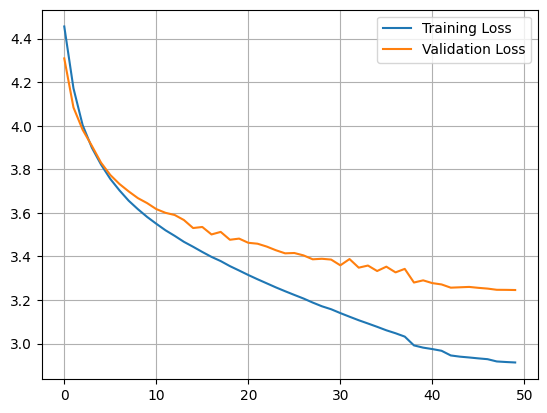

In [51]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.grid()
plt.legend()

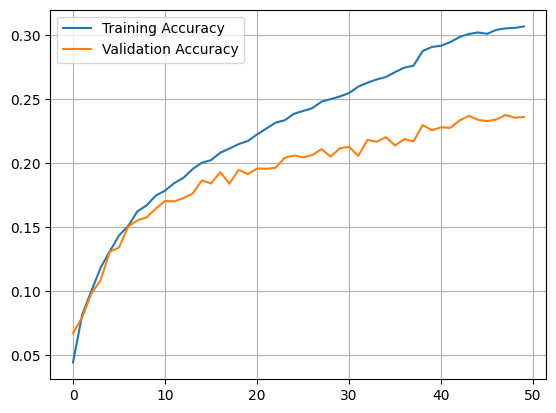

In [52]:
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.grid()
plt.legend()

In [65]:
predictions = model.predict(x_test_proc).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [66]:
print(predictions.shape)
print(predictions[1])

(10000,)
80


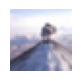

Prediction (fine): bridge




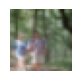

Prediction (fine): squirrel




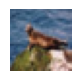

Prediction (fine): camel




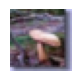

Prediction (fine): clock




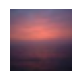

Prediction (fine): sea




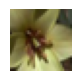

Prediction (fine): bee




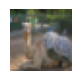

Prediction (fine): possum




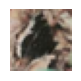

Prediction (fine): beetle




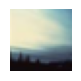

Prediction (fine): sea




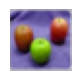

Prediction (fine): bowl




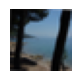

Prediction (fine): television




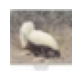

Prediction (fine): skunk




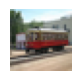

Prediction (fine): pickup_truck




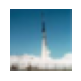

Prediction (fine): rocket




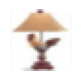

Prediction (fine): lamp




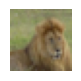

Prediction (fine): lion




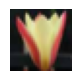

Prediction (fine): tulip




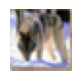

Prediction (fine): chair




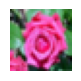

Prediction (fine): rose




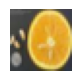

Prediction (fine): orange




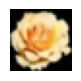

Prediction (fine): rose




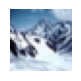

Prediction (fine): rocket




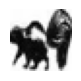

Prediction (fine): pickup_truck




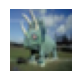

Prediction (fine): plain




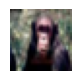

Prediction (fine): chimpanzee




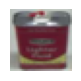

Prediction (fine): butterfly




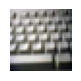

Prediction (fine): cloud




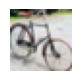

Prediction (fine): bicycle




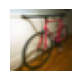

Prediction (fine): woman




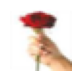

Prediction (fine): wardrobe




In [70]:
for i in range(30):
    plt.figure(figsize=(0.8, 0.8))
    plt.imshow(x_test[i])
    plt.axis('off')
    plt.show()
    
    fine_pred = predictions[i]
    print("Prediction (fine):", labels_fine[fine_pred])
    print("\n")

In [69]:
df = pd.DataFrame(predictions, columns=["Label"])
df.index.name = "Id"
df.head()
df.to_csv("submission.csv")